In [95]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

import scipy
from scipy.stats import spearmanr

import matplotlib.pyplot as plt
from pylab import rcParams
import seaborn as sb

import sklearn
from sklearn.preprocessing import scale
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn import preprocessing

In [96]:
data = 'random_sampling(1-10000).csv'
users = pd.read_csv(data)
users.head()

,maciek2552,maciek2552.1,5/5/1991,maciek2552.2,100.000,100.000.1,20.000,73.334,0
0,money3,money3,12/31/1969,money3,100.0,100.0,12.500,70.834,0
1,money6,money6,2/21/1986,money6,100.0,100.0,12.500,70.834,0
2,money7,money7,2/24/1957,money7,100.0,100.0,12.500,70.834,0
3,wwide2008,wwide2008,1/1/1983,wwide2008,100.0,100.0,10.527,70.176,0
4,jmamian,jmamian,2/26/1981,jmamian,100.0,100.0,0.000,66.667,0


In [111]:
users.columns = ['firstname','lastname','dob','password',
                'firstname_similarity','lastname_similarity',
                'dob_similarity','aggregate_similarity',
                'strength_aggregate']
users.head()


,firstname,lastname,dob,password,firstname_similarity,lastname_similarity,dob_similarity,aggregate_similarity,strength_aggregate
0,money3,money3,12/31/1969,money3,100.0,100.0,12.500,70.834,0
1,money6,money6,2/21/1986,money6,100.0,100.0,12.500,70.834,0
2,money7,money7,2/24/1957,money7,100.0,100.0,12.500,70.834,0
3,wwide2008,wwide2008,1/1/1983,wwide2008,100.0,100.0,10.527,70.176,0
4,jmamian,jmamian,2/26/1981,jmamian,100.0,100.0,0.000,66.667,0


In [112]:
train_sample=users.sample(n=5000)
test_sample=users.sample(n=3500)
train_sample.head()

,firstname,lastname,dob,password,firstname_similarity,lastname_similarity,dob_similarity,aggregate_similarity,strength_aggregate
9004,Frank,McMillon,1/23/1967,Mr_Mack**,28.572,23.530,0.000,17.368,1
4847,mallibabu,emani,8/10/1960,lali9likki,20.000,26.667,10.000,26.258,1
8139,James,green,12/1/1981,cigna187,11.765,30.770,23.530,22.022,1
1487,Ranjith,Rabel,6/19/1956,anj1956,90.910,16.667,47.059,35.528,0
5979,shamsul,hj hashim,1/9/1970,700109,0.000,0.000,28.572,9.524,1


In [113]:
user_train_data = train_sample.ix[:,(4,5,6)].values # selects features (independent vars fname similarity,lname similarity,dob similarity,aggregate password similarity)
user_train_data_names = ['firstname_similarity','lastname_similarity',
                  'dob_similarity'] #names the above features
y1 = train_sample.ix[:,8].values #our target variable (password strength)
user_test_data = test_sample.ix[:,(4,5,6)].values
user_train_data_names = ['firstname_similarity','lastname_similarity',
                  'dob_similarity']
y2 = test_sample.ix[:,8].values
#Please note that using .ix will throw a deprecation warning, it should still work fine however

C:\Users\Axiom\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.
C:\Users\Axiom\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  after removing the cwd from sys.path.
C:\Users\Axiom\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """
C:\Users\Axiom\Anacond

In [114]:
users.isnull().sum() #just checks to make sure there is no null vals
#should return all 0's


firstname               1
lastname                1
dob                     0
password                0
firstname_similarity    0
lastname_similarity     0
dob_similarity          0
aggregate_similarity    0
strength_aggregate      0
dtype: int64

In [115]:
train_sample.describe()

,firstname_similarity,lastname_similarity,dob_similarity,aggregate_similarity,strength_aggregate
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,38.890868,32.622557,12.196937,27.950997,0.646000
std,22.097819,20.204854,15.545547,8.320693,0.478257
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25.000000,17.392000,0.000000,22.576000,0.000000
50%,35.295000,30.770000,9.524000,27.778000,1.000000
75%,50.000000,42.858000,22.223000,32.593000,1.000000
max,100.000000,100.000000,88.889000,70.176000,1.000000


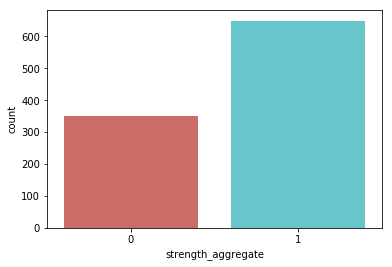

In [102]:
sb.countplot(x='strength_aggregate',data=train_sample,palette='hls') 
#check distribution of the data. 0's are bad 1's are good 
# as of 3/21 we have about a 40/60 split of 0's and 1's respectively 

In [103]:
X1 = scale(user_train_data)
X2 = scale(user_test_data)#scales data so all attributes are of same scale 
#throws out data that is of magnitudes greater than the other data in the set 
#essentially removes outliers

#lab_enc = preprocessing.LabelEncoder()
#encoded = lab_enc.fit_transform(y) 

# the above is needd because for whatever reason the 1's and 0's
# of the training score are being interpreted as floats

In [104]:
LogReg = LogisticRegression()
LogReg.fit(X1,y1) #fits model on training set 
LogReg.score(X1,y1)


C:\Users\Axiom\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.837

In [105]:
y_pred = LogReg.predict(X1) #given the features, what would this algorithm predict
from sklearn.metrics import classification_report # the way to display that classification
print(classification_report(y1,y_pred)) # will print the actual value (good or bad) next to what the algorithm thinks

              precision    recall  f1-score   support

           0       0.83      0.68      0.74       351
           1       0.84      0.92      0.88       649

   micro avg       0.84      0.84      0.84      1000
   macro avg       0.83      0.80      0.81      1000
weighted avg       0.84      0.84      0.83      1000

